# Linear Discriminant Analysis (LDA)

##### What is LDA?
Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction technique used for classification problems. Unlike PCA, which is unsupervised and focuses only on variance, LDA maximizes class separability by finding directions that maximize the distance between classes while minimizing the scatter within each class.

##### Key Concepts in LDA:

- Scatter Matrices:

    Within-class scatter matrix (S_W): Measures the spread of data points within each class.
    Between-class scatter matrix (S_B): Measures the separation between class means.

- Objective of LDA:

    LDA finds a linear combination of features that maximizes the ratio of between-class scatter to within-class scatter.

- Applications:

    Pattern recognition
    Image classification
    Facial recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# 1. Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels (species)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Apply LDA for dimensionality reduction (reduce to 2 components)
lda = LDA(n_components=2)  # Reduce to 2 dimensions
X_train_lda = lda.fit_transform(X_train, y_train)  # Fit and transform training data
X_test_lda = lda.transform(X_test)  # Transform testing data

In [2]:
# 4. Print LDA components and explained variance
print("LDA Coefficients (Eigenvectors):")
print(lda.scalings_)
print()

LDA Coefficients (Eigenvectors):
[[ 0.80026697  0.03612268]
 [ 1.98970608  2.39784046]
 [-2.33550565 -0.64759059]
 [-2.40282949  2.17195973]]



In [3]:
print("Explained Variance Ratio:")
explained_variance = np.cumsum(lda.explained_variance_ratio_)
print(explained_variance)
print()

Explained Variance Ratio:
[0.98883569 1.        ]



In [6]:
# 5. Train a classifier (KNN) using the reduced features
model = KNeighborsClassifier(n_neighbors=3)  # Using k=3
model.fit(X_train_lda, y_train)  # Train classifier on reduced dimensions

# 6. Predict labels for test data
y_pred = model.predict(X_test_lda)  # Make predictions
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Accuracy after LDA: {accuracy * 100:.2f}%")

Accuracy after LDA: 100.00%


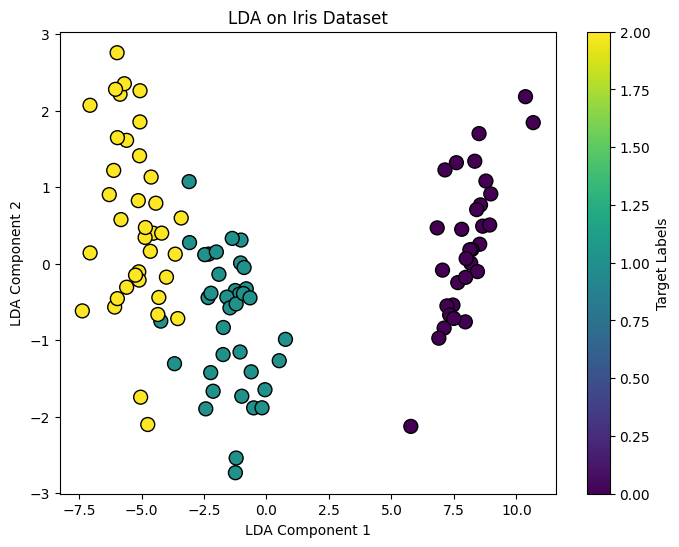

In [5]:
# 7. Visualize LDA results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Target Labels')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA on Iris Dataset')
plt.show()